In [1]:
import sys
!{sys.executable} -m pip install PyAthena

In [2]:
from pyathena import connect
import pandas as pd

In [3]:
# Establish connection to Athena
conn = connect(s3_staging_dir='s3://vehicledatastep3/', region_name='us-east-1')

In [6]:
# Query Athena
query = 'SELECT * from vehicledatalab4.vehicledatastep3 where timestep_time is not null'
df = pd.read_sql(query, conn)
print("Column names in the DataFrame:", df.columns)

/tmp/ipykernel_7453/492198644.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Column names in the DataFrame: Index(['timestep_time', 'vehicle_co', 'vehicle_co2', 'vehicle_hc',
       'vehicle_nox', 'vehicle_pmx', 'vehicle_angle', 'vehicle_eclass',
       'vehicle_electricity', 'vehicle_fuel', 'vehicle_id', 'vehicle_lane',
       'vehicle_noise', 'vehicle_pos', 'vehicle_route', 'vehicle_speed',
       'vehicle_type', 'vehicle_waiting', 'vehicle_x', 'vehicle_y',
       'partition_0', 'partition_1', 'partition_2', 'partition_3'],
      dtype='object')


In [11]:
#printing the dataframe
df

,timestep_time,vehicle_co,vehicle_co2,vehicle_hc,vehicle_nox,vehicle_pmx,vehicle_angle,vehicle_eclass,vehicle_electricity,vehicle_fuel,...,vehicle_route,vehicle_speed,vehicle_type,vehicle_waiting,vehicle_x,vehicle_y,partition_0,partition_1,partition_2,partition_3
0,2.0,149.59,3770.59,0.77,1.68,0.08,356.91,HBEFA3/PC_G_EU4,0.0,1.62,...,!veh1!var#1,2.32,veh_passenger,0.0,29251.89,24426.48,2024,11,17,17
1,3.0,143.93,5255.34,0.78,2.32,0.11,356.91,HBEFA3/PC_G_EU4,0.0,2.26,...,!veh1!var#1,4.78,veh_passenger,0.0,29251.63,24431.26,2024,11,17,17
2,4.0,117.19,5042.82,0.65,2.17,0.10,359.03,HBEFA3/PC_G_EU4,0.0,2.17,...,!veh1!var#1,6.51,veh_passenger,0.0,29251.46,24437.77,2024,11,17,17
3,5.0,115.66,5968.58,0.67,2.56,0.12,359.62,HBEFA3/PC_G_EU4,0.0,2.57,...,!veh1!var#1,8.30,veh_passenger,0.0,29251.41,24446.07,2024,11,17,17
4,6.0,109.77,6504.63,0.65,2.77,0.13,359.62,HBEFA3/PC_G_EU4,0.0,2.80,...,!veh1!var#1,9.99,veh_passenger,0.0,29251.34,24456.06,2024,11,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,430.0,0.00,0.00,0.00,0.00,0.00,298.40,HBEFA3/PC_G_EU4,0.0,0.00,...,!veh2!var#1,5.71,veh_passenger,0.0,18935.89,25391.61,2024,11,17,17
1910,431.0,109.43,5124.67,0.62,2.19,0.10,294.29,HBEFA3/PC_G_EU4,0.0,2.20,...,!veh2!var#1,7.30,veh_passenger,0.0,18929.23,25394.61,2024,11,17,17
1911,432.0,103.06,5630.60,0.60,2.39,0.11,288.67,HBEFA3/PC_G_EU4,0.0,2.42,...,!veh2!var#1,8.84,veh_passenger,0.0,18921.01,25397.79,2024,11,17,17
1912,433.0,141.56,8504.72,0.85,3.68,0.18,285.03,HBEFA3/PC_G_EU4,0.0,3.66,...,!veh2!var#1,11.05,veh_passenger,0.0,18910.35,25400.69,2024,11,17,17


In [7]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'CO2 Emission by Vehicle')

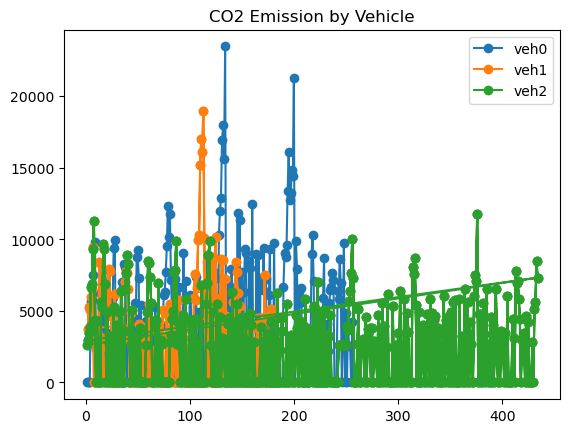

In [15]:
# Plotting the CO2 emission by vehicle
i=0
fig, ax = plt.subplots()
# Group the data by customers and plot each group
for vehicle_id, group in df.groupby('vehicle_id'):
    plt.plot(group['timestep_time'], group['vehicle_co2'], marker='o', label=vehicle_id)

plt.legend()
plt.title("CO2 Emission by Vehicle")


Text(0.5, 1.0, 'CO Emission by Vehicle')

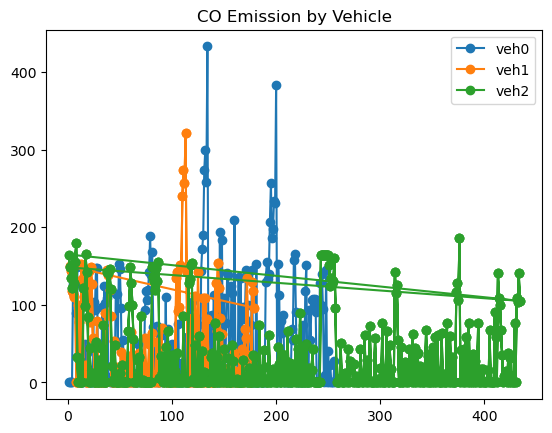

In [16]:
# Plotting the CO emission by vehicle
i=0
fig, ax = plt.subplots()
# Group the data by customers and plot each group
for vehicle_id, group in df.groupby('vehicle_id'):
    plt.plot(group['timestep_time'], group['vehicle_co'], marker='o', label=vehicle_id)
plt.legend()
plt.title("CO Emission by Vehicle")


In [18]:
import seaborn as sns

/tmp/ipykernel_7453/2272426095.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


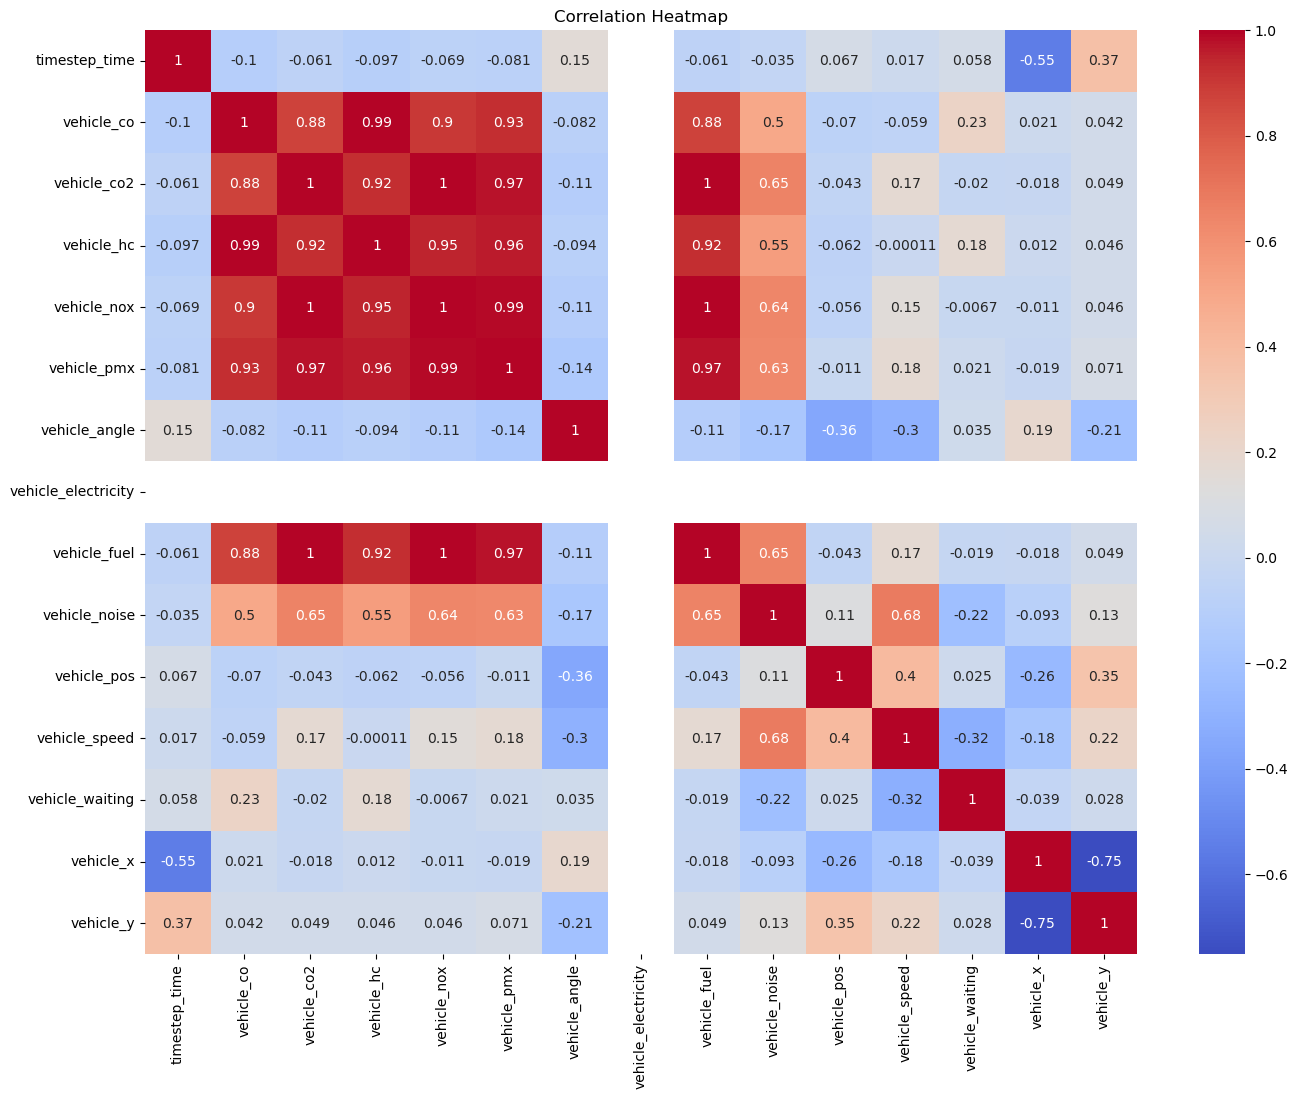

In [20]:
#Finding Correlation between different datasets
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

